# Kaggle : Predict survival on the Titanic
- Analysis Titanic data from kaggle

## Data Dictionary
### variable
- survival : 0 = No, 1 = Yes
- pclass : Ticket class / 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
- sex
- Age : Age in year
- sibsp : Number of siblings or spouses aboard the Titanic
- parch : Number of parents or childern
- ticket : Ticket number
- fare : Passenger fare
- cabin : Cabin number
- embarked : Port of embarked / C = Cherbourg, Q = Queenstown, S = Southamthon

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()
print('\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null flo

In [7]:
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
def chart_bar(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    total = survived + dead
    survived_rate = survived/total
    df = pd.DataFrame([survived_rate])
    df.plot(kind = 'bar', title = ('Survived Rate : ' + feature), rot = 0, ylim = (0, 1))

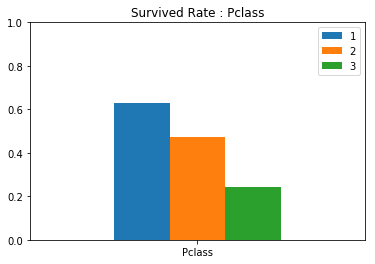

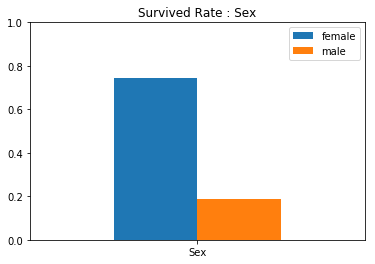

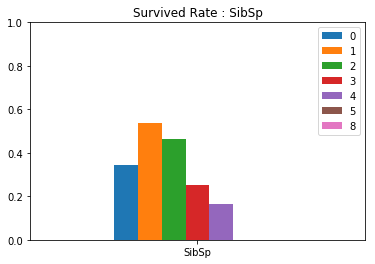

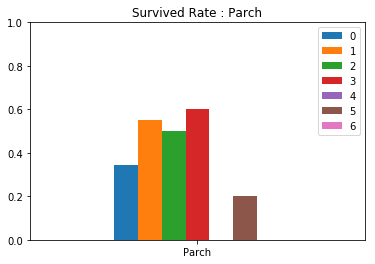

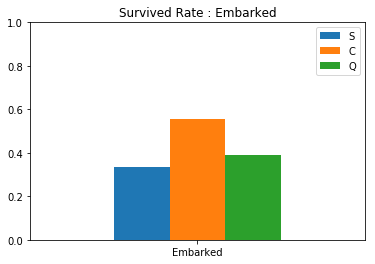

In [10]:
chart_bar('Pclass')
chart_bar('Sex')
chart_bar('SibSp')
chart_bar('Parch')
chart_bar('Embarked')

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Engineering

## 1. Sex
- According to graph, "Sex" is the main element of survived rate.

In [12]:
train_test_data = [train, test]
for data in train_test_data:
    data.loc[data.Sex == 'male', 'Sex'] = 1
    data.loc[data.Sex == 'female', 'Sex'] = 0
# or
# sex_mapping = {'male' : 1, 'female' : 0}
# for data in train_test_data:
#    data["Sex"] = data["Sex"].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


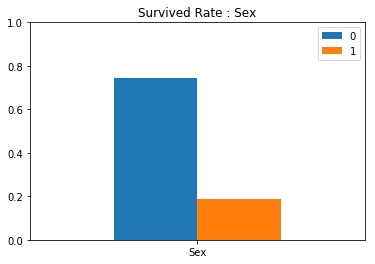

In [13]:
chart_bar("Sex")

## 2. Age
- Age should be a good indicator of survived rate.
- There are several NAN data in the age, so I convert those data to number.
- I assume NaN with 'Name' which include word 'Ms', 'Mr', else.

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
merge_name_age = pd.concat([train[["Name", "Age"]], test[["Name", "Age"]]])
merge_name_age.head()

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


In [17]:
merge_name_age["Name"] = merge_name_age["Name"].str.extract('([A-Za-z]+)[.]', expand = False)
merge_name_age.head()

,Name,Age
0,Mr,22.0
1,Mrs,38.0
2,Miss,26.0
3,Mrs,35.0
4,Mr,35.0


In [18]:
merge_name_age["Name"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Lady          1
Capt          1
Mme           1
Countess      1
Sir           1
Jonkheer      1
Dona          1
Don           1
Name: Name, dtype: int64

In [19]:
print("Mean of 'Mr' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Mr'].Age.mean()), '\n')
print("Mean of 'Miss' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Miss'].Age.mean()), '\n')
print("Mean of 'Mrs' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Mrs'].Age.mean()), '\n')
print("Mean of 'Master' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Master'].Age.mean()), '\n')
print("Mean of else : Mean of numbers after convert upper ages")
Mr_mean = np.floor(merge_name_age[merge_name_age["Name"] == 'Mr'].Age.mean())
Miss_mean = np.floor(merge_name_age[merge_name_age["Name"] == 'Miss'].Age.mean())
Mrs_mean = np.floor(merge_name_age[merge_name_age["Name"] == 'Mrs'].Age.mean())
Master_mean =  np.floor(merge_name_age[merge_name_age["Name"] == 'Master'].Age.mean())

Mean of 'Mr' age :  32.0 

Mean of 'Miss' age :  21.0 

Mean of 'Mrs' age :  36.0 

Mean of 'Master' age :  5.0 

Mean of else : Mean of numbers after convert upper ages


In [20]:
for data in train_test_data:
    data["Name"] = data["Name"].str.extract('([A-Za-z]+)[.]', expand = False)
    for name, mean in zip(['Mr', 'Miss', 'Mrs', 'Master'], [Mr_mean, Miss_mean, Mrs_mean, Master_mean]):
        data[data["Name"] == name]["Age"].fillna(mean, inplace = True)
    data["Age"].fillna(np.floor(data["Age"].mean()), inplace = True)
    data["Age"] = data["Age"].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## 3. Name
- We can get some useful data from name that affect in the result

In [21]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35,0,0,373450,8.0500,NaN,S


In [22]:
print(train_test_data[0]["Name"].unique())
name_mapping = {'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3}
for name in merge_name_age['Name'].value_counts().index[4:]:
    name_mapping.update({'{}'.format(name) : 4})
for data in train_test_data:
    data["Name"] = data["Name"].map(name_mapping)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


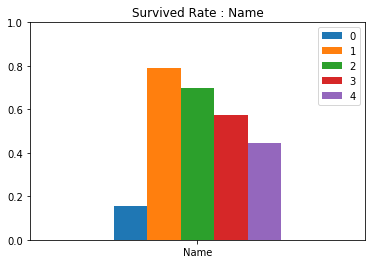

In [23]:
chart_bar('Name')

In [24]:
train_test_data[0].info()
print('\n')
train_test_data[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null int64
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 80.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2,0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,0,35,1,0,113803,53.1000,C123,S
4,5,0,3,0,1,35,0,0,373450,8.0500,NaN,S


## 4.Embarked
- We need to fill 2 NaN data.

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2,0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,0,35,1,0,113803,53.1000,C123,S
4,5,0,3,0,1,35,0,0,373450,8.0500,NaN,S


In [26]:
def chart_embarked(feature, ax):
    df = train.groupby(['Embarked', feature]).size().unstack().T
    df.div(df.sum(axis = 0)).plot(kind = 'bar', rot = 0, title = '{} - Embarked'.format(feature), ax = axes[ax])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


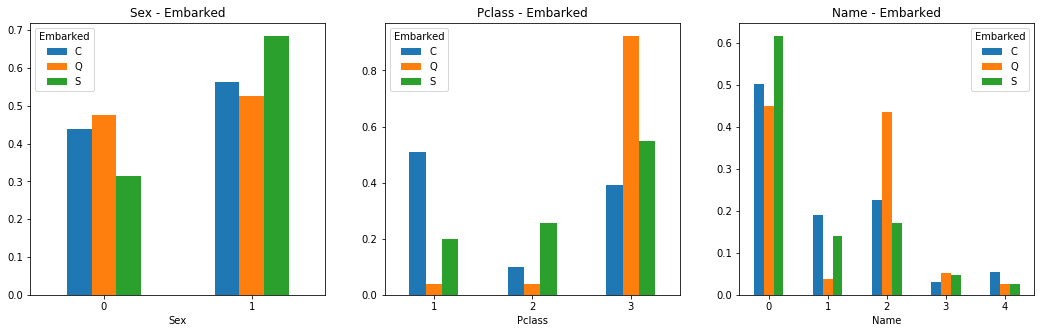

In [71]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))
chart_embarked('Sex', 0)
chart_embarked('Pclass', 1)
chart_embarked('Name', 2)
train.loc[train["Embarked"].isnull()]

In [28]:
print('People around 50 : \n',train.loc[(train['Age'] > 60) & (train['Age'] < 70), 'Embarked'].value_counts()/train.Embarked.value_counts(), '\n')
print('People around 30 : \n',train.loc[(train['Age'] > 30) & (train['Age'] < 40), 'Embarked'].value_counts()/train.Embarked.value_counts())

People around 50 : 
 C    0.005952
Q    0.012987
S    0.018634
Name: Embarked, dtype: float64 

People around 30 : 
 S    0.175466
C    0.125000
Q    0.064935
Name: Embarked, dtype: float64


1. Passenger62 > Name : Q, Pclass : C, Sex : Q, Age : S
2. Paseenger830 > Name : C, Pclass : C, Sex : Q, Age : S<br>
3. **In Conclusion, 62 : Q, 830 : C** 

In [29]:
train.loc[train['PassengerId'] == 62, 'Embarked'] = 'Q'
train.loc[train['PassengerId'] == 830, 'Embarked'] = 'C'
train.info()
print('\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null int64
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 80.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null

## 5. Fare
- Test data has 1 NaN data
- Let's fill it with mean of Fare.

In [30]:
test.loc[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,0,1,60,0,0,3701,NaN,NaN,S


In [31]:
merge_df = pd.concat([train, test])
merge_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,NaN,S,7.2500,0,0,1,3,1,1,0.0,A/5 21171
1,38,C85,C,71.2833,1,0,2,1,0,1,1.0,PC 17599
2,26,NaN,S,7.9250,2,0,3,3,0,0,1.0,STON/O2. 3101282
3,35,C123,S,53.1000,1,0,4,1,0,1,1.0,113803
4,35,NaN,S,8.0500,0,0,5,3,1,0,0.0,373450


In [195]:
test.loc[test['Fare'].isnull(), 'Fare'] = merge_df.loc[(merge_df["Pclass"] == 3) & (merge_df["Embarked"] == 'S')]['Fare'].mean()
print(test.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 34.4+ KB
None 



Text(0,0.5,'Fare')

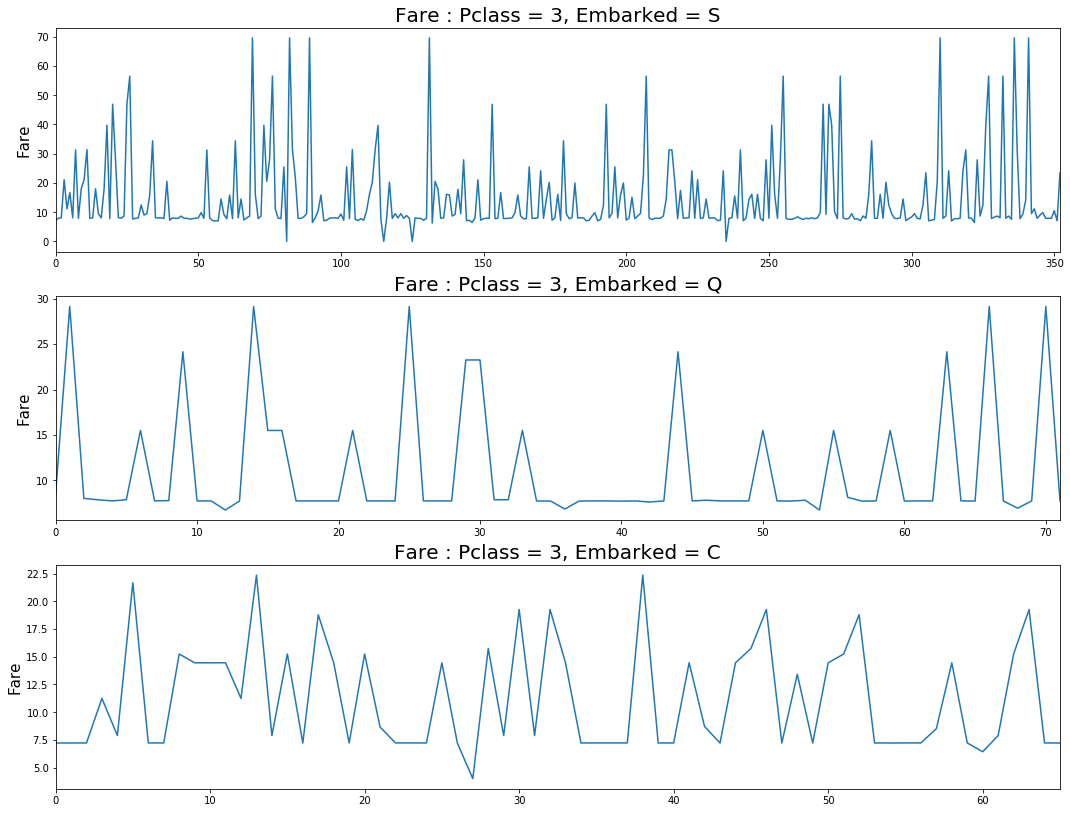

In [196]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (18,14))
ax1 = train.loc[(train["Pclass"] == 3) & (train["Embarked"] == 'S')]['Fare'].reset_index(drop = True).plot(title = 'Fare : Pclass = 3, Embarked = S', ax = axes[0])
ax2 = train.loc[(train["Pclass"] == 3) & (train["Embarked"] == 'Q')]['Fare'].reset_index(drop = True).plot(title = 'Fare : Pclass = 3, Embarked = Q', ax = axes[1])
ax3 = train.loc[(train["Pclass"] == 3) & (train["Embarked"] == 'C')]['Fare'].reset_index(drop = True).plot(title = 'Fare : Pclass = 3, Embarked = C', ax = axes[2])

ax1.title.set_size(20)
ax2.title.set_size(20)
ax3.title.set_size(20)

ax1.set_ylabel('Fare', fontsize = 15)
ax2.set_ylabel('Fare', fontsize = 15)
ax3.set_ylabel('Fare', fontsize = 15)

In [270]:
%autosave 1000

Autosaving every 1000 seconds


In [325]:
train.max()

PassengerId          891
Survived               1
Pclass                 3
Name                   4
Sex                    1
Age                   80
SibSp                  8
Parch                  6
Ticket         WE/P 5735
Fare             512.329
Embarked               S
dtype: object

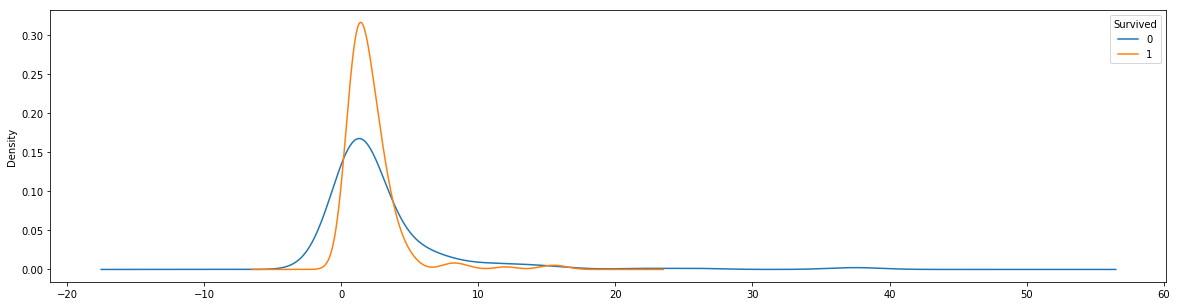

In [337]:
train[['Fare', 'Survived']].groupby(['Survived', 'Fare']).size().unstack().T.plot(kind = 'kde', figsize = (20,5))

In [339]:
import seaborn as sns